# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**DURATION CONSIDERED:**
- mtl: 1,2,3,4 and 5 minutes + 6 minutes as the reference  
- gva: 1,2,3,4,5,6,9 and 12 minutes + 15 minutes as the reference  

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K, or across multiple Ks)
    

In [2]:
import sys,json

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization

### Load configuration file 

In [ ]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Visualizing components: "gva" 1min vs 15min

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


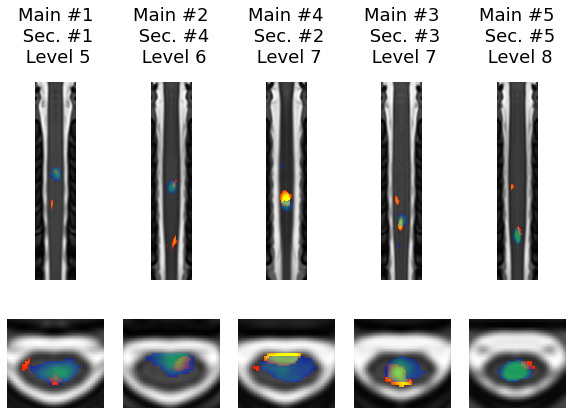

In [4]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration',"duration": "1min"}
params_qual_2 = {'k':5, 'dataset':'gva', 'analysis':'ica_duration' ,"duration":"15min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)
plotting.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=1.5, uthresh=3, save_results=False)

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


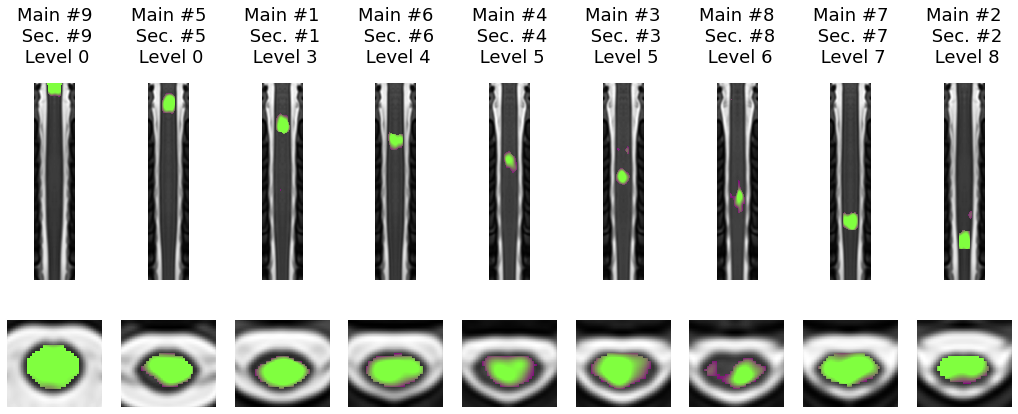

In [5]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':9, 'dataset':'mtl', 'analysis':'ica_duration',"duration": "1min"}
params_qual_2 = {'k':9, 'dataset':'mtl', 'analysis':'ica_duration',"duration": "6min"}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_1)
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.5, uthresh=3, save_results=False)

# Quantitative analyses

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/15min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/1min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/2min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/3min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/4min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/gva/spinalcord/temporal_cropping/5min/K_5/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_s

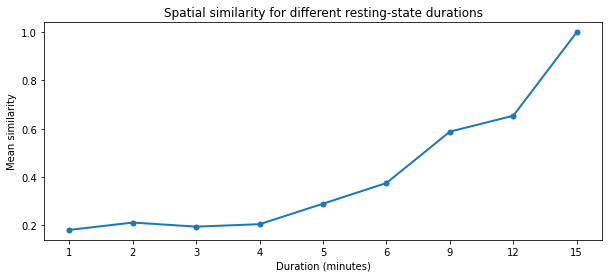

In [6]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[1,2,3,4,5,6,9,12,15]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"ica_duration",'t_range':[15]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)
#spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Overlap',save_results=False,save_figure=False)
#spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Euclidean distance',save_results=False,save_figure=False)

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/6min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/1min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/2min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/3min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/4min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/temporal_cropping/5min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_sp

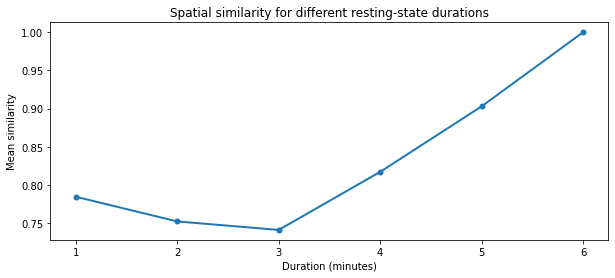

In [7]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="mtl"
t_range=[1,2,3,4,5,6]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':dataset, 'analysis':"ica_duration",'t_range':[6]}
params_quant_gva_2 = {'k_range':range(9,10), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=5,t_range1=6,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)
spine_analysis_gva.spatial_similarity(k1=5,t_range1=6,t_range2=t_range,similarity_method='Overlap',save_results=False,save_figure=False)
#spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Euclidean distance',save_results=False,save_figure=False)

### Plot over analyses and conditions

In [101]:
import pandas as pd
import glob
import seaborn as sns
conditions={}
input_dir= config["main_dir"] + "ICA/results_spine_only/results/duration_figure/"
for cond in ["gva_ica","gva_icap","mtl_ica","mtl_icap"]:
    dataset=cond.split("_")[0]
    method=cond.split("_")[1]
    conditions[cond]=pd.read_csv(glob.glob(input_dir + cond +"_*.txt")[0],delimiter = " ", names=["Time","Dice"], header=None)
    conditions[cond]["Datasets"]=np.repeat(dataset, len(conditions[cond]))
    conditions[cond]["Methods"]=np.repeat(method, len(conditions[cond]))
    
frame=[conditions["gva_ica"],conditions["gva_icap"],conditions["mtl_ica"],conditions["mtl_icap"]]
final_dataframe = pd.concat(frame)

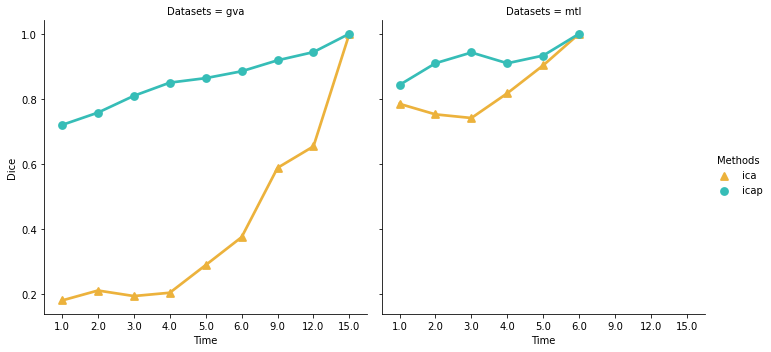

In [111]:
sns.catplot(data=final_dataframe, x="Time", y="Dice",hue="Methods",col="Datasets",kind="point",markers=["^", "o"],
           palette={"ica": "#ecb23c", "icap":"#36bdb7"},) #,style=Method



### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

In [185]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica_duration2 at K = 5 vs gva_ica_duration at K = 5 

The mean similarity is 1.00


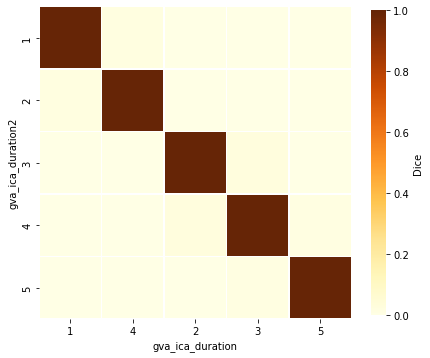

In [224]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_1 = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica_duration',"duration": "15min"}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica_duration',"duration": "2min"}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,k2=5,similarity_method='Dice',save_results=False,save_figure=False)

In [206]:
t_range2=2

In [210]:
np.array(t_range2).size

1

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs mtl_ica at K = 36 

The mean similarity is 0.47


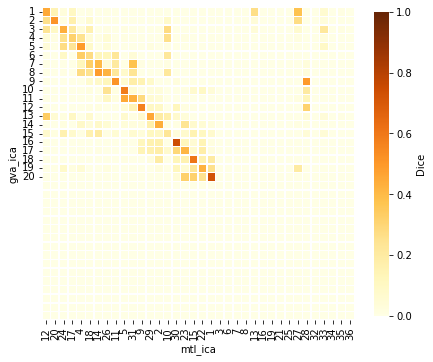

In [172]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=20,k2=36,similarity_method='Dice')

### Investigate axial distribution for different Ks

### `ICA` method

### Instantiate class

### Instantiate class

In [236]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.65


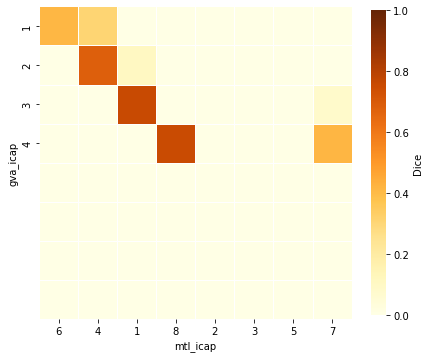

In [237]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.54


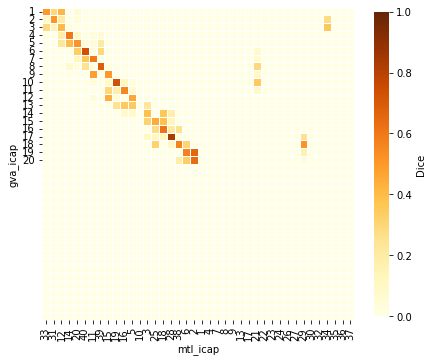

In [238]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')